In [3]:
import pandas as pd

# Load both datasets (make sure the filenames match exactly)
train = pd.read_csv("train_set_folds.tsv", sep="\t")
benchmark = pd.read_csv("benchmark_set.tsv", sep="\t")

# Check if loaded correctly
print("Training set shape:", train.shape)
print("Benchmark set shape:", benchmark.shape)

# Show first few rows
train.head()


Training set shape: (8021, 9)
Benchmark set shape: (2006, 7)


,EntryID,OrganismName,Kingdom,SequenceLength,SPStart,SPEnd,Class,Set,HelixDomain
0,P53725,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,186,NaN,NaN,Negative,2,False
1,P23369,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,157,NaN,NaN,Negative,4,False
2,Q8IBN8,Plasmodium falciparum (isolate 3D7),Other,899,NaN,NaN,Negative,4,False
3,Q07688,Saccharomyces cerevisiae (strain ATCC 204508 /...,Fungi,167,NaN,NaN,Negative,5,False
4,P27793,Capnoides sempervirens,Viridiplantae,447,NaN,NaN,Negative,5,False


Training set class counts:
Class
Negative    7147
Positive     874
Name: count, dtype: int64


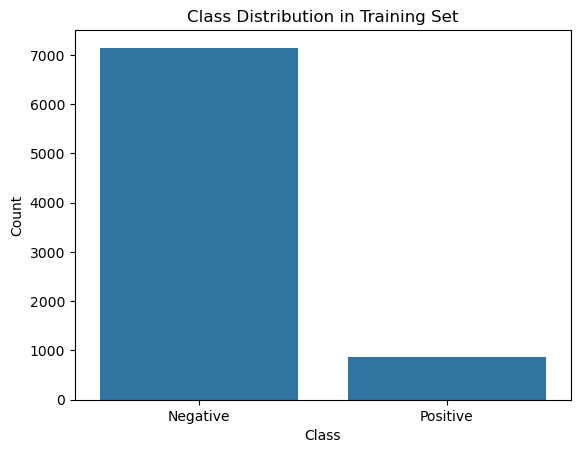

In [5]:
# Class balance (Positive vs Negative)
class_counts = train['Class'].value_counts()

print("Training set class counts:")
print(class_counts)

# Optional: visualize with a barplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [7]:
# Explore benchmark set taxonomy distribution
print("Kingdom distribution in benchmark set:")
print(benchmark['Kingdom'].value_counts())


Kingdom distribution in benchmark set:
Kingdom
Metazoa          1125
Fungi             512
Viridiplantae     331
Other              38
Name: count, dtype: int64


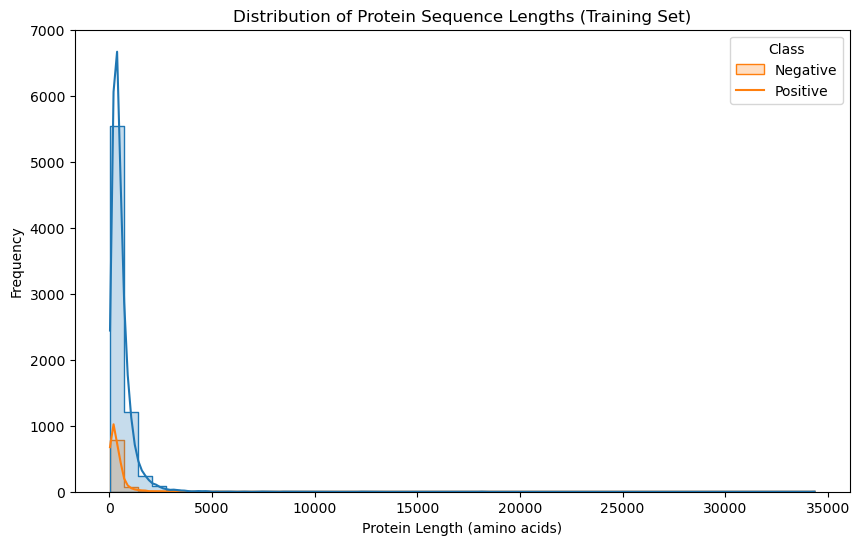

Summary statistics:
           count        mean         std   min    25%    50%     75%      max
Class                                                                        
Negative  7147.0  572.904575  707.510308  40.0  264.0  422.0  689.00  34350.0
Positive   874.0  393.840961  448.541479  46.0  141.0  267.0  473.75   5263.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing or invalid lengths (safety check)
train = train.dropna(subset=['SequenceLength'])

# Plot histogram comparing sequence lengths
plt.figure(figsize=(10,6))
sns.histplot(data=train, x='SequenceLength', hue='Class', bins=50, kde=True, element='step')
plt.title("Distribution of Protein Sequence Lengths (Training Set)")
plt.xlabel("Protein Length (amino acids)")
plt.ylabel("Frequency")
plt.legend(title="Class", labels=["Negative", "Positive"])
plt.show()

# Optional: summary statistics
print("Summary statistics:")
print(train.groupby('Class')['SequenceLength'].describe())
